# Plot Bounding Boxes

If you want to check out what the different kinds of marks and bounding boxes look like on some plots.

In [4]:
fake_figs_dir = '~/Downloads/tmp/JCDL2025/visual_qa_histograms/example_hists_complex/' # large dataset, same format

img_format = 'jpeg' # just test one format at a time if there are multiple

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
import pickle
import pandas as pd
#import string
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import ImageColor
import json
import os
from copy import deepcopy
import copy

from utils.metric_utils.utilities import isRectangleOverlap

import time

import matplotlib as mpl
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}' #for \text command

# written libs -- will update locally
from utils.synthetic_fig_utils import subset_by_percent, \
 get_nrows_and_ncols, normalize_params_prob, get_ticks, get_titles_or_labels, \
 get_font_info

from utils.plot_utils import get_contour_plot, get_histogram_plot, \
   get_line_plot, get_scatter_plot, make_plot, colorbar_mods#, get_line_plot

from utils.text_utils import get_popular_nouns, get_inline_math

# create a bunch of fake figures
from utils.synthetic_fig_utils import normalize_params_prob
from utils.plot_parameters import plot_types_params, panel_params, \
  title_params, xlabel_params, colorbar_params, \
  ylabel_params, aspect_fig_params, dpi_params, tight_layout_params, \
  fontsizes, base

from utils.data_utils import get_data, NumpyEncoder
import numpy as np

import utils.distribution_utils

from importlib import reload
from utils.plot_qa_utils import log_scale_ax
import utils.distribution_utils
import utils.data_utils
reload(utils.distribution_utils)
reload(utils.data_utils)
from utils.data_utils import get_data
import utils.plot_classes_utils
reload(utils.plot_classes_utils)

from utils.synthetic_fig_utils import add_titles_and_labels

import utils.plot_utils
import utils.data_utils
import utils.plot_classes_utils
reload(utils.plot_classes_utils)
reload(utils.data_utils)
reload(utils.plot_utils)
from utils.plot_utils import make_plot, make_base_plot
from utils.data_utils import get_data

from utils.plot_utils import markers, make_base_plot

import utils.synthetic_fig_utils
reload(utils.synthetic_fig_utils)
from utils.synthetic_fig_utils import collect_plot_data_axes

from utils.figure_gen_utils.misc import add_annotations

marker_sizes = np.arange(0,10)+1
line_list_thick = np.arange(1,10)

use_uniques = True # use unique inlines
verbose = True

from sys import path
path.append('/Library/TeX/texbin/')

# debug
from importlib import reload

# for seed
from sys import maxsize as maxint

import warnings
warnings.filterwarnings("error")

In [8]:
# for some versions
fake_figs_dir = os.path.expanduser(fake_figs_dir)
#fake_figs_dir
#fake_figs_dir + 'imgs/*' + img_format

In [9]:
# get all figures
fig_files = glob(fake_figs_dir + 'imgs/*' + img_format)
len(fig_files)

10

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:gmm
  n_clusters = 4

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:gmm
  n_clusters = 2

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:linear
m * x + b: m & b = -3.002113964658922 & -64.91420995271181

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:random

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:random

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:random

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:linear
m * x + b: m & b = 0.4028150956565335 & 83.11453563958054

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:random

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:linear
m * x + b: m & b = -0.28817035744194586 & 10.441290156513006

 ------ Plot #0 ------ 
Plot type:histogram
Distribution:gmm
  n_clusters = 3



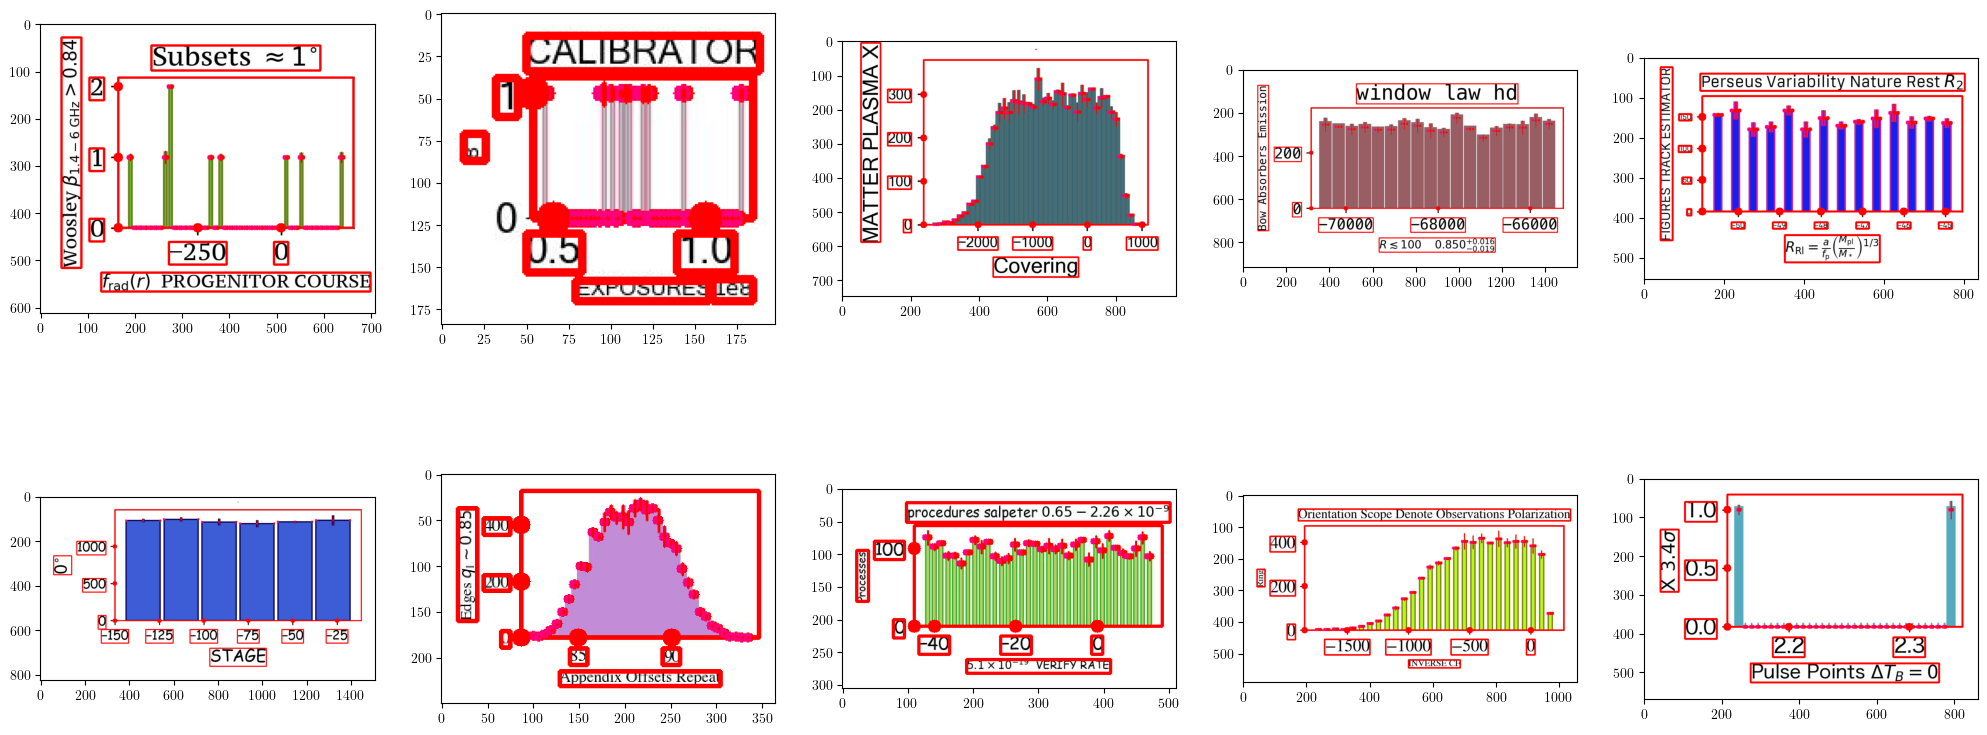

In [26]:
nrows = 2 # how many rows of images to plot?
ncols = 5 # how many columns of images to plot?
base = 5 # base size

# get randoms
if nrows*ncols >= len(fig_files):
    ifigures = np.arange(len(fig_files))
else:
    ifigures = np.random.choice(np.arange(len(fig_files)),replace=False, size=nrows*ncols)

fig,axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=(base*ncols, base*nrows))
axes = axes.flatten()

for iax,ax in enumerate(axes):
    fig_file = fig_files[ifigures[iax]]
    json_file = fig_files[ifigures[iax]].replace('/imgs/','/jsons/').removesuffix(img_format) + 'json'
    #print(fig_file)
    #print(json_file)
    with open(json_file, 'r') as f:
        j = json.load(f)
        datas = json.loads(j)

    img_diag = np.array(Image.open(fig_file).convert('RGB'))
    imgplot = add_annotations(img_diag, img_diag, deepcopy(datas)) 
    ax.imshow(imgplot)

In [27]:
datas['VQA']

{'Level 1': {'Figure-level questions': {},
  'Plot-level questions': {'nbars': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  How many bars are there in the specified figure panel? Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.',
     'A': {'nbars': 34},
     'persona': 'You are a helpful assistant that can analyze images.',
     'context': '',
     'question': 'How many bars are there in the specified figure panel?',
     'format': 'Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.'}}}},
 'Level 2': {'Plot-level questions': {'minimum': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  What is the minimum value of the data in this figure panel?  Please format the output as a json as {"minimum x":""} for this figure panel, where the "minimum x" value should be a float, calculated from the data values u